In [1]:
import random
import numpy as np
np.random.seed(seed=1337)
max_weight = 10
n_items = 16
max_value = (2**n_items) 
weights =  np.random.rand(n_items)
values = np.random.rand(n_items)

In [2]:
from numba import njit,prange
@njit(parallel=True)
def encodeNumber(number,bits=n_items):
    return np.array([bool(number & (1<<(bits-1-x))) for x in prange(bits)])

In [3]:
@njit()
def scoreFunction(mask, weights=weights,values=values,max_weight=max_weight,max_value=max_value):
    final_weight = 0
    score = 0 
    for i in prange(weights.size):
        if mask[i]:
            final_weight+=weights[i]
            score+=values[i]
    return 0 if final_weight > max_weight else score

In [6]:
@njit(parallel=True)
def getData():
    return np.array([scoreFunction(encodeNumber(x)) for x in prange(2**n_items)])
%time data = getData()

Wall time: 379 ms


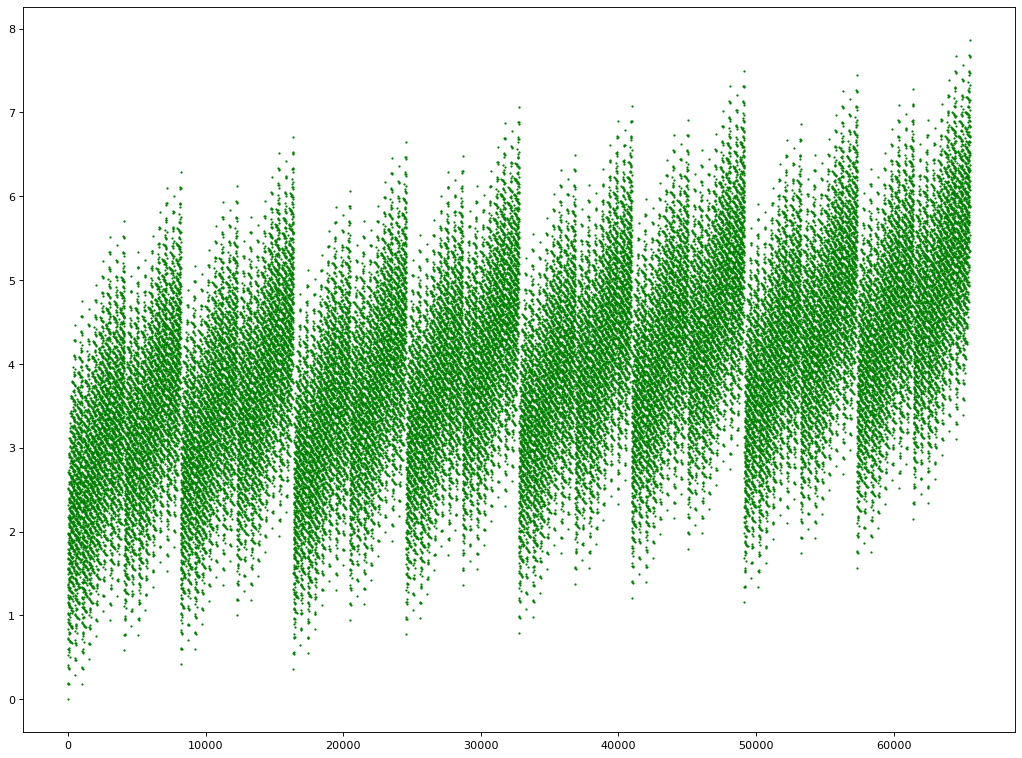

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12), dpi=80) 
plt.scatter(range(len(data)), data,color="g",s=1)
# plt.ylabel('scores')
plt.show()